In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Defina o caminho completo para o arquivo CSV
file_path = 'SQLT0002.csv'

# Carregar o arquivo CSV
df = pd.read_csv(file_path, sep=',', encoding='utf-8')

# Remover os símbolos '=' e aspas nas colunas
df.columns = df.columns.str.replace(r'="', '').str.replace(r'"', '')

# Remover '=' e aspas em cada célula, caso ocorra em todas as entradas
df = df.apply(lambda x: x.str.replace(r'="', '').str.replace(r'"', '') if x.dtype == 'object' else x)


In [7]:
df.columns

Index(['CD_PACIENTE', 'NOME', 'SEXO', 'IDADE', 'DATA_INTERNACAO', 'DATA_ALTA',
       'MOTIVO_ALTA', 'TEMPO_INTERNADO', 'CID', 'EXAME', 'RESULTADO',
       'DATA_EXAME', 'DATA_AVISO_CIRURGIA', 'CIRURGIA', 'CLASSIFICACAO_ASA',
       'TIPO_CIRURGIA', 'UTILIZA_SANGUE', 'UTILIZA_CONGELACAO',
       'TIPO_ANESTESIA', 'INFECCAO', 'DATA_COLETA_SINAL_VITAL', 'SINAL_VITAL',
       'VALOR_SINAL_VITAL'],
      dtype='object')

In [8]:
# Criar uma coluna para indicar se o paciente fez cirurgia ou não (True ou False)
df['FEZ_CIRURGIA'] = df['DATA_AVISO_CIRURGIA'].notnull()

# Criar uma coluna para classificar o tempo de internação
df['CLASSIFICACAO_TEMPO_INTERNADO'] = pd.cut(df['TEMPO_INTERNADO'], 
                                              bins=[0, 5, 20, float('inf')], 
                                              labels=['Curta', 'Média', 'Longa'])

# Primeiro, remover duplicatas nas informações gerais do paciente
df_unico = df[['CD_PACIENTE', 'NOME', 'SEXO', 'IDADE', 'DATA_INTERNACAO', 'DATA_ALTA', 'MOTIVO_ALTA', 
               'TEMPO_INTERNADO', 'CID', 'CLASSIFICACAO_ASA', 'TIPO_CIRURGIA', 
               'UTILIZA_SANGUE', 'UTILIZA_CONGELACAO', 'TIPO_ANESTESIA', 'INFECCAO']].drop_duplicates()

In [9]:
# Pivotar os sinais vitais
df_sinais_vitais = df.pivot_table(
    index=['CD_PACIENTE'],
    columns='SINAL_VITAL',
    values='VALOR_SINAL_VITAL',
    aggfunc='first'  # Pega o primeiro valor se houver duplicatas
).reset_index()

# Pivotar os exames
df_exames = df.pivot_table(
    index=['CD_PACIENTE'],
    columns='EXAME',
    values='RESULTADO',
    aggfunc='first'  # Pega o primeiro valor de cada exame se houver duplicatas
).reset_index()

# Juntar as informações pivotadas com o DataFrame único de pacientes
df_final = df_unico.merge(df_sinais_vitais, on='CD_PACIENTE', how='left')
df_final = df_final.merge(df_exames, on='CD_PACIENTE', how='left')


In [25]:
df_final

,CD_PACIENTE,NOME,SEXO,IDADE,DATA_INTERNACAO,DATA_ALTA,MOTIVO_ALTA,TEMPO_INTERNADO,CID,CLASSIFICACAO_ASA,TIPO_CIRURGIA,UTILIZA_SANGUE,UTILIZA_CONGELACAO,TIPO_ANESTESIA,INFECCAO,ALTURA,CAPNOGRAFIA,CETONURIA,CIRCUNFERENCIA ABDOMINAL,CIRCUNFERENCIA DE MMSS,FREQUENCIA CARDIACA,FREQUENCIA RESPIRATORIA,GLICEMIA CAPILAR,GLICOSURIA,PERIMETRO CEFALICO,PESO,PRESSAO ARTERIAL DIASTOLICA,PRESSAO ARTERIAL INVASIVA,PRESSAO ARTERIAL MEDIA,PRESSAO ARTERIAL SISTOLICA,PRESSAO VENOSA CENTRAL,PULSO,SATURAC?O DE O2,TEMPERATURA AXILAR,TEMPERATURA CENTRAL,,ACIDO URICO,ALBUMINA,AMILASE,ATIVIDADE (TP),BASOFILOS,BASOFILOS ABS,BASTOES ABS,BILIRRUBINA DIRETA,BILIRRUBINA INDIRETA,BILIRRUBINA TOTAL,BLASTOS,BLASTOS ABS,BLIRRUBINA TOTAL,CAPACIDADE DE FIXACAO DO FERRO,CHCM,CLORO,DESIDROGRENASE LACTICA,DOSAGEM DE CALCIO,DOSAGEM DE CREATININA,DOSAGEM DE GLICOSE,DOSAGEM DE METOTREXATO,EOSINOFILOS,EOSINOFILOS ABS,ERITROBLASTROS,FIBRINOGENIO,GAMA GT,HCM,HEMACIAS,HEMATOCRITO,HEMOGLOBINA,LEUCOCITOS,LINFOCITOS,LINFOCITOS ABS,MAGNESIO,METAMIELOCITOS,METAMIELOCITOS ABS,MIELOCITOS,MIELOCITOS ABS,MONOCITOS,MONOCITOS ABS,MPV,NEUTROFILOS,NEUTROFILOS ABS,NEUTROFILOS BASTONETES,NEUTROFILOS SEGMENTADOS,OBSERVAC?O,OBSERVACAO,OBSERVACAO SB,PLAQUETAS,POTASSIO,PROMIELOCITO ABS,PROMIELOCITOS,PROTEINA C REATIVA,RDW,RELAC?O ( RNI),RELACAO (PACIENTE/NORMAL),SODIO,TEMPO (TP),TEMPO (TTPA),TGO,TGP,UREIA,VCM,VHS
0,22849,RESERVADO PARA PACIENTES DE URGENCIA,M,10,27/03/2018,19/09/2018,ALTA A PEDIDO,176,NAUSEA E VOMITOS,ASA II (Paciente com enfermidade sistemica leve),Cirurgia Eletiva,Nao,Nao,GERAL ENDOVENOSA + INALATORIA COM REINALACAO,NAO,160.0,NaN,4.0,32.0,14.0,22.0,22.0,200.0,3.0,23.0,60.0,22.0,NaN,70.0,22.0,NaN,NaN,22.0,22.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"202,056",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21340,NOME DO PACIENTE 21340,I,0,23/07/2018,06/08/2018,ALTA MELHORADO,14,"OUTROS TIPOS DE LINFOMA N?O-HODGKIN, FOLICULAR",Desconhecido,Desconhecido,Desconhecido,Desconhecido,,NAO,NaN,NaN,0.0,NaN,NaN,101.0,20.0,NaN,0.0,NaN,NaN,63.0,NaN,80.0,110.0,NaN,NaN,100.0,36.7,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19946,GABRIEL SILVA DE GODOY,M,12,31/07/2018,05/08/2018,ALTA MELHORADO,5,NEOPLASIA MALIGNA DOS OSSOS LONGOS DOS MEMBROS...,Desconhecido,Desconhecido,Desconhecido,Desconhecido,,NAO,0.0,NaN,0.0,0.0,0.0,101.0,21.0,0.0,0.0,0.0,0.0,101.0,NaN,69.0,55.0,NaN,NaN,97.0,36.9,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13850,ADRYANN GUSTAVO EVANGELISTA SIQUEIRA,M,14,31/07/2018,03/08/2018,ALTA APOS CICLO DE QT,3,"DOENCA DE HODGKIN, PREDOMINANCIA LINFOCITICA",Desconhecido,Desconhecido,Desconhecido,Desconhecido,,NAO,NaN,NaN,0.0,NaN,NaN,107.0,19.0,NaN,0.0,NaN,NaN,98.0,NaN,69.0,53.0,NaN,NaN,99.0,36.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21336,GUILHERME KAUAN SILVA DE SOUZA,M,3,24/06/2018,27/08/2018,ALTA POR OUTROS MOTIVOS,64,LEUCEMIA LINFOBLASTICA AGUDA,ASA III (Paciente com enfermidade sistemica se...,Cirurgia Eletiva,Nao,Nao,LOCAL,SIM,0.0,0.0,0.0,0.0,0.0,95.0,21.0,0.0,0.0,0.0,13.8,64.0,0.0,79.0,108.0,0.0,NaN,94.0,37.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [14]:
df_final.columns

Index(['CD_PACIENTE', 'NOME', 'SEXO', 'IDADE', 'DATA_INTERNACAO', 'DATA_ALTA',
       'MOTIVO_ALTA', 'TEMPO_INTERNADO', 'CID', 'CLASSIFICACAO_ASA',
       'TIPO_CIRURGIA', 'UTILIZA_SANGUE', 'UTILIZA_CONGELACAO',
       'TIPO_ANESTESIA', 'INFECCAO', 'ALTURA', 'CAPNOGRAFIA', 'CETONURIA',
       'CIRCUNFERENCIA ABDOMINAL', 'CIRCUNFERENCIA DE MMSS',
       'FREQUENCIA CARDIACA', 'FREQUENCIA RESPIRATORIA', 'GLICEMIA CAPILAR',
       'GLICOSURIA', 'PERIMETRO CEFALICO', 'PESO',
       'PRESSAO ARTERIAL DIASTOLICA', 'PRESSAO ARTERIAL INVASIVA',
       'PRESSAO ARTERIAL MEDIA', 'PRESSAO ARTERIAL SISTOLICA',
       'PRESSAO VENOSA CENTRAL', 'PULSO', 'SATURAC?O DE O2',
       'TEMPERATURA AXILAR', 'TEMPERATURA CENTRAL', '', 'ACIDO URICO',
       'ALBUMINA', 'AMILASE', 'ATIVIDADE (TP)', 'BASOFILOS', 'BASOFILOS ABS',
       'BASTOES ABS', 'BILIRRUBINA DIRETA', 'BILIRRUBINA INDIRETA',
       'BILIRRUBINA TOTAL', 'BLASTOS', 'BLASTOS ABS', 'BLIRRUBINA TOTAL',
       'CAPACIDADE DE FIXACAO DO FERRO', '

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [22]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')
#restaurar

In [27]:
# Verificar o número de valores nulos por coluna
df_final.isnull().sum()

# Percentual de valores nulos por coluna
df_final.isnull().mean() * 100


CD_PACIENTE                        0.000000
NOME                               0.000000
SEXO                               0.000000
IDADE                              0.000000
DATA_INTERNACAO                    0.000000
DATA_ALTA                          0.000000
MOTIVO_ALTA                        0.000000
TEMPO_INTERNADO                    0.000000
CID                                0.000000
CLASSIFICACAO_ASA                  0.000000
TIPO_CIRURGIA                      0.000000
UTILIZA_SANGUE                     0.000000
UTILIZA_CONGELACAO                 0.000000
TIPO_ANESTESIA                     0.000000
INFECCAO                           0.000000
ALTURA                            81.318681
CAPNOGRAFIA                       92.307692
CETONURIA                         72.527473
CIRCUNFERENCIA ABDOMINAL          81.318681
CIRCUNFERENCIA DE MMSS            81.318681
FREQUENCIA CARDIACA                0.000000
FREQUENCIA RESPIRATORIA            0.000000
GLICEMIA CAPILAR                

In [31]:
# Selecionando apenas colunas numéricas
df_numericas = df_final.select_dtypes(include=['float64', 'int64'])


In [32]:
# Calculando a correlação para variáveis numéricas
corr_matrix = df_numericas.corr()

# Exibir a matriz de correlação
print(corr_matrix)


                             CD_PACIENTE     IDADE  TEMPO_INTERNADO    ALTURA  \
CD_PACIENTE                     1.000000  0.022480         0.189221  0.240833   
IDADE                           0.022480  1.000000         0.267413 -0.029653   
TEMPO_INTERNADO                 0.189221  0.267413         1.000000  0.730854   
ALTURA                          0.240833 -0.029653         0.730854  1.000000   
CAPNOGRAFIA                    -0.279932  0.253579        -0.951276       NaN   
CETONURIA                       0.227912 -0.006520         0.711976  1.000000   
CIRCUNFERENCIA ABDOMINAL        0.240833 -0.029653         0.730854  1.000000   
CIRCUNFERENCIA DE MMSS          0.240833 -0.029653         0.730854  1.000000   
FREQUENCIA CARDIACA             0.004455 -0.253741        -0.275936 -0.729428   
FREQUENCIA RESPIRATORIA         0.200559 -0.171691         0.049296  0.226964   
GLICEMIA CAPILAR               -0.358386 -0.096902         0.041966  0.360395   
GLICOSURIA                  

In [33]:
# Calculando a correlação para variáveis numéricas
corr_matrix = df_numericas.corr()

# Exibir a matriz de correlação
print(corr_matrix)


                             CD_PACIENTE     IDADE  TEMPO_INTERNADO    ALTURA  \
CD_PACIENTE                     1.000000  0.022480         0.189221  0.240833   
IDADE                           0.022480  1.000000         0.267413 -0.029653   
TEMPO_INTERNADO                 0.189221  0.267413         1.000000  0.730854   
ALTURA                          0.240833 -0.029653         0.730854  1.000000   
CAPNOGRAFIA                    -0.279932  0.253579        -0.951276       NaN   
CETONURIA                       0.227912 -0.006520         0.711976  1.000000   
CIRCUNFERENCIA ABDOMINAL        0.240833 -0.029653         0.730854  1.000000   
CIRCUNFERENCIA DE MMSS          0.240833 -0.029653         0.730854  1.000000   
FREQUENCIA CARDIACA             0.004455 -0.253741        -0.275936 -0.729428   
FREQUENCIA RESPIRATORIA         0.200559 -0.171691         0.049296  0.226964   
GLICEMIA CAPILAR               -0.358386 -0.096902         0.041966  0.360395   
GLICOSURIA                  

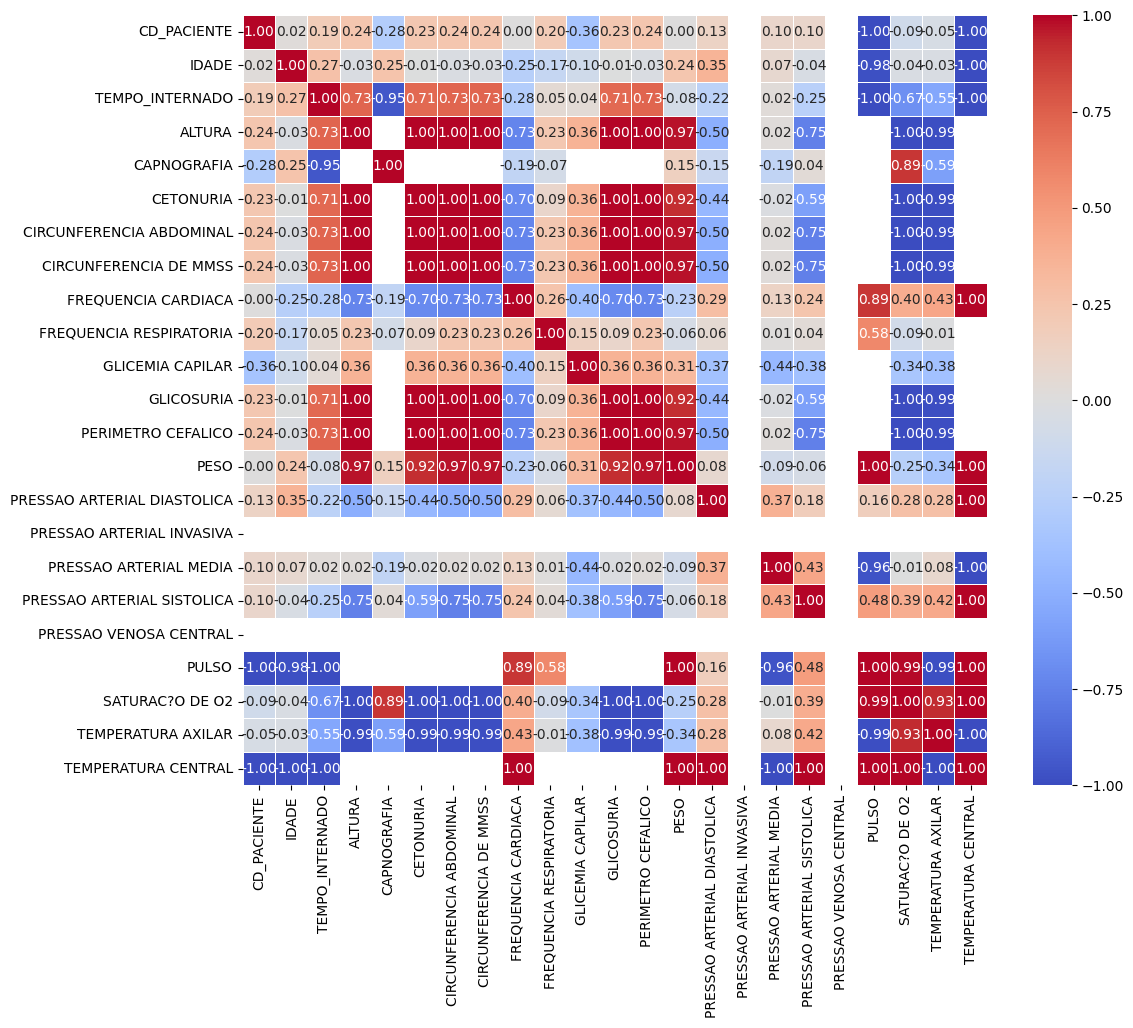

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Ajustar o tamanho do gráfico para bases grandes
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.show()


In [41]:
# Filtrar correlações fortes
corr_fortes = corr_matrix[(corr_matrix > 0.7) | (corr_matrix < -0.7)]
print(corr_fortes)


                             CD_PACIENTE    IDADE  TEMPO_INTERNADO    ALTURA  \
CD_PACIENTE                     1.000000      NaN              NaN       NaN   
IDADE                                NaN  1.00000              NaN       NaN   
TEMPO_INTERNADO                      NaN      NaN         1.000000  0.730854   
ALTURA                               NaN      NaN         0.730854  1.000000   
CAPNOGRAFIA                          NaN      NaN        -0.951276       NaN   
CETONURIA                            NaN      NaN         0.711976  1.000000   
CIRCUNFERENCIA ABDOMINAL             NaN      NaN         0.730854  1.000000   
CIRCUNFERENCIA DE MMSS               NaN      NaN         0.730854  1.000000   
FREQUENCIA CARDIACA                  NaN      NaN              NaN -0.729428   
FREQUENCIA RESPIRATORIA              NaN      NaN              NaN       NaN   
GLICEMIA CAPILAR                     NaN      NaN              NaN       NaN   
GLICOSURIA                           NaN

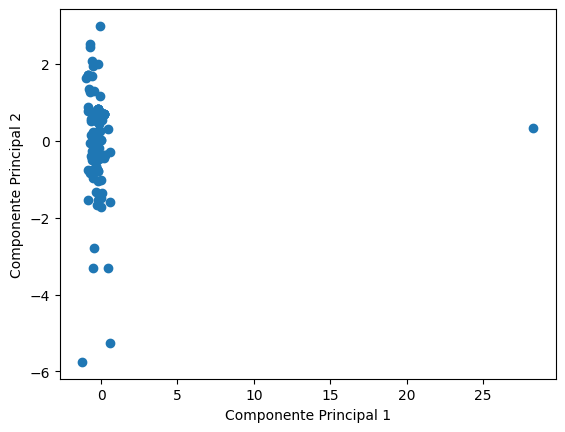

In [39]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numericas.fillna(0))

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

# Visualizar os dois primeiros componentes
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [40]:
# Correlação de 'TEMPO_INTERNADO' com outras variáveis
corr_tempo_internado = corr_matrix['TEMPO_INTERNADO'].sort_values(ascending=False)
print(corr_tempo_internado)


TEMPO_INTERNADO                1.000000
ALTURA                         0.730854
CIRCUNFERENCIA ABDOMINAL       0.730854
PERIMETRO CEFALICO             0.730854
CIRCUNFERENCIA DE MMSS         0.730854
CETONURIA                      0.711976
GLICOSURIA                     0.711976
IDADE                          0.267413
CD_PACIENTE                    0.189221
FREQUENCIA RESPIRATORIA        0.049296
GLICEMIA CAPILAR               0.041966
PRESSAO ARTERIAL MEDIA         0.023866
PESO                          -0.075135
PRESSAO ARTERIAL DIASTOLICA   -0.224837
PRESSAO ARTERIAL SISTOLICA    -0.246588
FREQUENCIA CARDIACA           -0.275936
TEMPERATURA AXILAR            -0.551106
SATURAC?O DE O2               -0.673196
CAPNOGRAFIA                   -0.951276
PULSO                         -0.995700
TEMPERATURA CENTRAL           -1.000000
PRESSAO ARTERIAL INVASIVA           NaN
PRESSAO VENOSA CENTRAL              NaN
Name: TEMPO_INTERNADO, dtype: float64
